# Predictions of Vcr and Vn of CFS channels with slotted webs using ANNs

This notebook allows for predicting elastic buckling loads, Vcr, and ultimate shear strengths, Vn, of cold-formed steel channels with slotted webs (also known as thermoprofiles) using artificial neural networks described in V.V. Degtyarev, Neural networks for predicting shear strength of CFS channels with slotted webs, Journal of Constructional Steel Research (submitted).

Vcr is predicted using the following models:
- ANN with one hidden layer with 100 neurons and 12 input parameters (12-100-1) with a learning rate of 0.3, a mini-batch size of none, and the MSE loss function (this model referenced as Vcr_1HL_MSE in the notebook);
- ANN with one hidden layer with 100 neurons and 12 input parameters (12-100-1) with a learning rate of 0.2, a mini-batch size of none, and the MAPE loss function (this model referenced as Vcr_1HL_MAPE in the notebook);
- ANN with two hidden layers with 100 neurons in each and 12 input parameters (12-100-100-1) with a learning rate of 0.2, a mini-batch size of 256, and the MSE loss function (this model referenced as Vcr_2HL_MSE in the notebook);
- ANN with two hidden layers with 100 neurons in each and 12 input parameters (12-100-100-1) with a learning rate of 0.1, a mini-batch size of 64, and the MAPE loss function (this model referenced as Vcr_2HL_MAPE in the notebook).

Vn is predicted using the following models:
- ANN with one hidden layer with 90 neurons and 13 input parameters (13-90-1) with a learning rate of 0.2, a mini-batch size of 64, and the MSE loss function (this model referenced as Vn_1HL_MSE in the notebook);
- ANN with one hidden layer with 100 neurons and 13 input parameters (13-100-1) with a learning rate of 0.2, a mini-batch size of 32, and the MAPE loss function (this model referenced as Vn_1HL_MAPE in the notebook).

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sys
from pickle import load

Using TensorFlow backend.


In [2]:
#Load trained models and scalers
from keras.models import load_model
model_Vcr_1HL_MSE = load_model('dr1_1HL_Adam_MSE_relu_relu_100_None_03_Vcr.h5')
model_Vcr_1HL_MSE.load_weights('dr1_1HL_Adam_MSE_relu_relu_100_None_03_Vcr.h5')
scaler_Vcr_1HL_MSE=load(open('scaler_dr1_1HL_Adam_MSE_relu_relu_100_None_03_Vcr.pkl', 'rb'))

model_Vcr_1HL_MAPE = load_model('dr1_1HL_Adam_MAPE_relu_relu_100_None_02_Vcr.h5')
model_Vcr_1HL_MAPE.load_weights('dr1_1HL_Adam_MAPE_relu_relu_100_None_02_Vcr.h5')
scaler_Vcr_1HL_MAPE=load(open('scaler_dr1_1HL_Adam_MAPE_relu_relu_100_None_02_Vcr.pkl', 'rb'))

model_Vcr_2HL_MSE = load_model('dr1_2HL_Adam_MSE_relu_relu_100_256_02_Vcr.h5')
model_Vcr_2HL_MSE.load_weights('dr1_2HL_Adam_MSE_relu_relu_100_256_02_Vcr.h5')
scaler_Vcr_2HL_MSE=load(open('scaler_dr1_2HL_Adam_MSE_relu_relu_100_256_02_Vcr.pkl', 'rb'))

model_Vcr_2HL_MAPE = load_model('dr1_2HL_Adam_MAPE_relu_relu_relu_100_64_01_Vcr.h5')
model_Vcr_2HL_MAPE.load_weights('dr1_2HL_Adam_MAPE_relu_relu_relu_100_64_01_Vcr.h5')
scaler_Vcr_2HL_MAPE=load(open('scaler_dr1_2HL_Adam_MAPE_relu_relu_relu_100_64_01_Vcr.pkl', 'rb'))

model_Vn_1HL_MSE = load_model('dr_1HL_Adam_MSE_relu_relu_90_64_02_V.h5')
model_Vn_1HL_MSE.load_weights('dr_1HL_Adam_MSE_relu_relu_90_64_02_V.h5')
scaler_Vn_1HL_MSE=load(open('scaler_dr_1HL_Adam_MSE_relu_relu_90_64_02_V.pkl', 'rb'))

model_Vn_1HL_MAPE = load_model('dr_1HL_Adam_MAPE_relu_relu_100_32_02_V.h5')
model_Vn_1HL_MAPE.load_weights('dr_1HL_Adam_MAPE_relu_relu_100_32_02_V.h5')
scaler_Vn_1HL_MAPE=load(open('scaler_dr_1HL_Adam_MAPE_relu_relu_100_32_02_V.pkl', 'rb'))

In [3]:
#Print weights of the models
np.set_printoptions(threshold=np.inf)
print('************************ Vcr_1HL_MSE **************************')
print(model_Vcr_1HL_MSE.get_weights())

print('************************ Vcr_1HL_MAPE **************************')
print(model_Vcr_1HL_MAPE.get_weights())

print('************************ Vcr_2HL_MSE **************************')
print(model_Vcr_2HL_MSE.get_weights())

print('************************ Vcr_2HL_MAPE **************************')
print(model_Vcr_2HL_MAPE.get_weights())

print('************************ Vn_1HL_MSE **************************')
print(model_Vn_1HL_MSE.get_weights())

print('************************ Vn_1HL_MAPE **************************')
print(model_Vn_1HL_MAPE.get_weights())

************************ Vcr_1HL_MSE **************************
[array([[-2.44764252e+01, -4.24204140e+01,  5.84709435e+01,
         2.55205078e+01,  3.48624191e+01,  3.07567253e+01,
         5.91472292e+00, -1.74342937e+01, -7.65927048e+01,
        -2.32623634e+01, -9.63340759e+01, -4.83532753e+01,
         4.46909065e+01, -1.95833702e+01, -2.90305161e+00,
        -4.80317230e+01,  1.10223513e+01,  7.62504625e+00,
        -3.05293083e+01, -5.22050667e+01, -4.13564758e+01,
         1.35790497e-01,  3.41240959e+01,  3.85898438e+01,
        -2.43095551e+01, -6.42893829e+01, -2.54757328e+01,
        -3.80582905e+00,  3.10131121e+00,  1.79562531e+01,
         1.85742092e+01, -7.42206693e-01,  4.23429718e+01,
        -3.43309631e+01,  3.14234886e+01,  1.55153627e+01,
         3.84150810e+01, -4.49724388e+00, -1.98518791e+01,
        -1.77763767e+01,  8.28648682e+01,  9.26262665e+01,
        -8.33446579e+01, -5.75462456e+01, -3.61842232e+01,
         3.65438614e+01,  7.08812332e+00, -5.85505

[array([[ 3.04987168e+00,  1.07153320e+01,  1.38505304e+00,
        -1.64827480e+01, -7.76064873e+00, -1.53800755e+01,
        -4.13114595e+00,  6.95351601e+00,  5.23770714e+00,
         1.01776171e+01, -1.17156096e+01,  3.90057921e-01,
         1.38584118e+01, -1.53547955e+00,  1.64868374e+01,
         2.23864615e-02, -1.53605089e+01, -4.73523617e-01,
         2.43549862e+01, -5.88970423e+00, -3.76970196e+00,
         9.04328346e+00,  4.91408777e+00,  3.59890866e+00,
        -1.43794260e+01,  7.50871420e+00,  5.59074879e+00,
        -5.59717536e-01,  6.83620024e+00, -1.01008110e+01,
        -1.66338520e+01, -1.17344933e+01,  8.28491592e+00,
        -1.32803698e+01,  2.73403215e+00,  7.92680120e+00,
        -3.89543653e+00, -2.35354214e+01,  2.13936596e+01,
        -6.51789951e+00, -2.41917915e+01,  1.18212759e+00,
         6.11603403e+00,  7.38631535e+00, -1.61454141e+00,
         3.90921402e+00, -6.04794645e+00,  1.73430119e+01,
        -2.56961703e+00, -2.94503269e+01, -2.60721040e+

R2_Vcr_1HL_MSE:0.9949920971586689


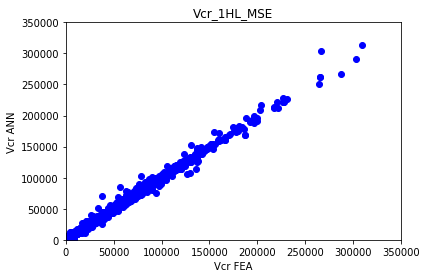

R2_Vcr_1HL_MAPE:0.984832759794452


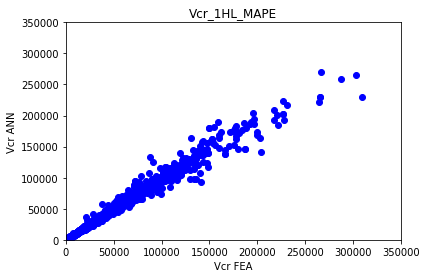

R2_Vcr_2HL_MSE:0.9964464543475832


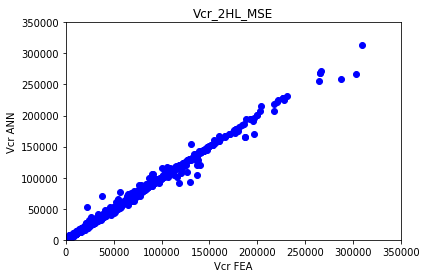

R2_Vcr_2HL_MAPE:0.995552326147173


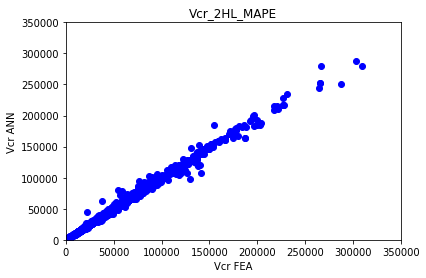

R2_Vn_1HL_MSE:0.995803429116417


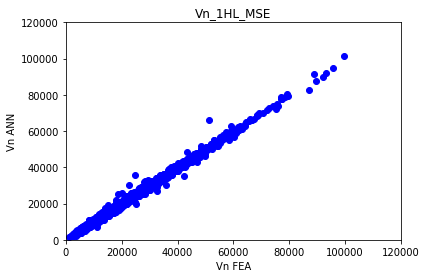

R2_Vn_2HL_MAPE:0.9957015787333006


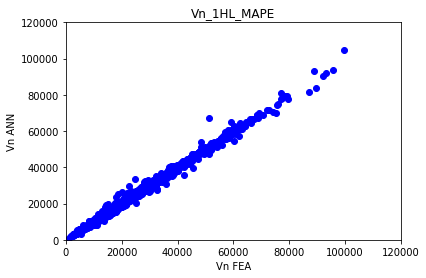

In [4]:
#Compare ANN predictions with FE predictions using the dataset used for training

DS=pd.read_excel('Shear_strength_of_CFS_channels_with_slotted_webs_FE_simulations_results.xlsm')
DS.replace({'BC': 'R'},1,inplace=True)
DS.replace({'BC': 'TS'},2,inplace=True)

Y_Vcr_DS=DS.drop(['Reference','Model ID','D (mm)','B (mm)','B1 (mm)','t (mm)','Lsl (mm)','Wsl (mm)','Ssl (mm)','Bsl (mm)','N','n','Fy (MPa)','BC','r (mm)','a/h','hst (mm)','Vn (N)'],axis=1).values
Y_Vn_DS=DS.drop(['Reference','Model ID','D (mm)','B (mm)','B1 (mm)','t (mm)','Lsl (mm)','Wsl (mm)','Ssl (mm)','Bsl (mm)','N','n','Fy (MPa)','BC','r (mm)','a/h','hst (mm)','Vcr (N)'],axis=1).values

X_Vcr_DS=DS.drop(['Reference','Model ID','B1 (mm)','Fy (MPa)','r (mm)','Vcr (N)','Vn (N)'],axis=1).values
X_Vn_DS=DS.drop(['Reference','Model ID','B1 (mm)','r (mm)','Vcr (N)','Vn (N)'],axis=1).values

#Scale Input Parameters
X_Vcr_1HL_MSE_DS=scaler_Vcr_1HL_MSE.transform(X_Vcr_DS)
X_Vcr_1HL_MAPE_DS=scaler_Vcr_1HL_MAPE.transform(X_Vcr_DS)
X_Vcr_2HL_MSE_DS=scaler_Vcr_2HL_MSE.transform(X_Vcr_DS)
X_Vcr_2HL_MAPE_DS=scaler_Vcr_2HL_MAPE.transform(X_Vcr_DS)
X_Vn_1HL_MSE_DS=scaler_Vn_1HL_MSE.transform(X_Vn_DS)
X_Vn_1HL_MAPE_DS=scaler_Vn_1HL_MAPE.transform(X_Vn_DS)

#Predict Vcr and Vn
Y_Vcr_1HL_MSE_Predict_DS=model_Vcr_1HL_MSE.predict(X_Vcr_1HL_MSE_DS)
Y_Vcr_1HL_MAPE_Predict_DS=model_Vcr_1HL_MAPE.predict(X_Vcr_1HL_MAPE_DS)
Y_Vcr_2HL_MSE_Predict_DS=model_Vcr_2HL_MSE.predict(X_Vcr_2HL_MSE_DS)
Y_Vcr_2HL_MAPE_Predict_DS=model_Vcr_2HL_MAPE.predict(X_Vcr_2HL_MAPE_DS)
Y_Vn_1HL_MSE_Predict_DS=model_Vn_1HL_MSE.predict(X_Vn_1HL_MSE_DS)
Y_Vn_1HL_MAPE_Predict_DS=model_Vn_1HL_MAPE.predict(X_Vn_1HL_MAPE_DS)

#Determine R2 and plot comparisons
from sklearn.metrics import r2_score

R2_Vcr_1HL_MSE=r2_score(Y_Vcr_DS,Y_Vcr_1HL_MSE_Predict_DS)
print('R2_Vcr_1HL_MSE:'+str(R2_Vcr_1HL_MSE))
plt.plot(Y_Vcr_DS,Y_Vcr_1HL_MSE_Predict_DS,'bo')
plt.title('Vcr_1HL_MSE')
plt.xlabel('Vcr FEA')
plt.ylabel('Vcr ANN')
plt.axis([0, 350000, 0, 350000])
plt.show()

R2_Vcr_1HL_MAPE=r2_score(Y_Vcr_DS,Y_Vcr_1HL_MAPE_Predict_DS)
print('R2_Vcr_1HL_MAPE:'+str(R2_Vcr_1HL_MAPE))
plt.plot(Y_Vcr_DS,Y_Vcr_1HL_MAPE_Predict_DS,'bo')
plt.title('Vcr_1HL_MAPE')
plt.xlabel('Vcr FEA')
plt.ylabel('Vcr ANN')
plt.axis([0, 350000, 0, 350000])
plt.show()

R2_Vcr_2HL_MSE=r2_score(Y_Vcr_DS,Y_Vcr_2HL_MSE_Predict_DS)
print('R2_Vcr_2HL_MSE:'+str(R2_Vcr_2HL_MSE))
plt.plot(Y_Vcr_DS,Y_Vcr_2HL_MSE_Predict_DS,'bo')
plt.title('Vcr_2HL_MSE')
plt.xlabel('Vcr FEA')
plt.ylabel('Vcr ANN')
plt.axis([0, 350000, 0, 350000])
plt.show()

R2_Vcr_2HL_MAPE=r2_score(Y_Vcr_DS,Y_Vcr_2HL_MAPE_Predict_DS)
print('R2_Vcr_2HL_MAPE:'+str(R2_Vcr_2HL_MAPE))
plt.plot(Y_Vcr_DS,Y_Vcr_2HL_MAPE_Predict_DS,'bo')
plt.title('Vcr_2HL_MAPE')
plt.xlabel('Vcr FEA')
plt.ylabel('Vcr ANN')
plt.axis([0, 350000, 0, 350000])
plt.show()

R2_Vn_1HL_MSE=r2_score(Y_Vn_DS,Y_Vn_1HL_MSE_Predict_DS)
print('R2_Vn_1HL_MSE:'+str(R2_Vn_1HL_MSE))
plt.plot(Y_Vn_DS,Y_Vn_1HL_MSE_Predict_DS,'bo')
plt.title('Vn_1HL_MSE')
plt.xlabel('Vn FEA')
plt.ylabel('Vn ANN')
plt.axis([0, 120000, 0, 120000])
plt.show()

R2_Vn_1HL_MAPE=r2_score(Y_Vn_DS,Y_Vn_1HL_MAPE_Predict_DS)
print('R2_Vn_2HL_MAPE:'+str(R2_Vn_1HL_MAPE))
plt.plot(Y_Vn_DS,Y_Vn_1HL_MAPE_Predict_DS,'bo')
plt.title('Vn_1HL_MAPE')
plt.xlabel('Vn FEA')
plt.ylabel('Vn ANN')
plt.axis([0, 120000, 0, 120000])
plt.show()

In [11]:
#Predict Vcr and Vn using created ANNs

#Input channel properties
D=150                        #channel depth in mm
B=45                         #cahnnel flange width in mm
t=1                          #channel thickness in mm
Lsl=60                       #length of slots in mm
Wsl=3                        #height of slots in mm
Ssl=100                      #spacing of slots in the lngitudinal direction in mm
Bsl=9.5                      #spacing of slots in the transverse direction in mm
N=1                          #number of perforated regions
n=6                          #number of slot rows
Fy=500                       #steel yield stress in mm
BC=1                         #boundary conditions: 1 for realistic and 2 for test setup
a_h=1                        #aspect ratio
hst=0                        #web stiffener height in mm


In [10]:
X_Vcr=np.array([[D, B, t, Lsl, Wsl, Ssl, Bsl, N, n, BC, a_h, hst]])
X_Vn=np.array([[D, B, t, Lsl, Wsl, Ssl, Bsl, N, n, Fy, BC, a_h, hst]])

X_Vcr_1HL_MSE=scaler_Vcr_1HL_MSE.transform(X_Vcr)
X_Vcr_1HL_MAPE=scaler_Vcr_1HL_MAPE.transform(X_Vcr)
X_Vcr_2HL_MSE=scaler_Vcr_2HL_MSE.transform(X_Vcr)
X_Vcr_2HL_MAPE=scaler_Vcr_2HL_MAPE.transform(X_Vcr)
X_Vn_1HL_MSE=scaler_Vn_1HL_MSE.transform(X_Vn)
X_Vn_1HL_MAPE=scaler_Vn_1HL_MAPE.transform(X_Vn)

Vcr_1HL_MSE=model_Vcr_1HL_MSE.predict(X_Vcr_1HL_MSE)
Vcr_1HL_MAPE=model_Vcr_1HL_MAPE.predict(X_Vcr_1HL_MAPE)
Vcr_2HL_MSE=model_Vcr_2HL_MSE.predict(X_Vcr_2HL_MSE)
Vcr_2HL_MAPE=model_Vcr_2HL_MAPE.predict(X_Vcr_2HL_MAPE)
Vn_1HL_MSE=model_Vn_1HL_MSE.predict(X_Vn_1HL_MSE)
Vn_1HL_MAPE=model_Vn_1HL_MAPE.predict(X_Vn_1HL_MAPE)

print('Vcr_1HL_MSE='+str(Vcr_1HL_MSE[0][0])+' N')
print('Vcr_1HL_MAPE='+str(Vcr_1HL_MAPE[0][0])+' N')
print('Vcr_2HL_MSE='+str(Vcr_2HL_MSE[0][0])+' N')
print('Vcr_2HL_MAPE='+str(Vcr_2HL_MAPE[0][0])+' N')
print('Vn_1HL_MSE='+str(Vn_1HL_MSE[0][0])+' N')
print('Vn_1HL_MAPE='+str(Vn_1HL_MAPE[0][0])+' N')

Vcr_1HL_MSE=3887.5518 N
Vcr_1HL_MAPE=4214.1636 N
Vcr_2HL_MSE=3850.8093 N
Vcr_2HL_MAPE=4003.3208 N
Vn_1HL_MSE=12586.372 N
Vn_1HL_MAPE=12447.293 N
